<p align="center">
  <a>
    <img src="./figures/logo-hi-paris-retina.png" alt="Logo" width="280" height="180">
  </a>

  <h3 align="center">Data Science Bootcamp</h3>
</p>

Authors : Yann Berthelot, Florian Bettini, Laure-Amélie Colin

# Initial setup
First let's save the work to your own working directory.

In [1]:
!cp -r ./* ~/my_work/ 
"""
cp : copy 
-r : recursively 
./* all the files in current folder
~/my_work : to the my_work folder located at the root of the system
"""

cp: './1_fires_preparationX_.ipynb' and '/home/jovyan/my_work/1_fires_preparationX_.ipynb' are the same file
cp: './data' and '/home/jovyan/my_work/data' are the same file
cp: './E_2_external_data_preparation.ipynb' and '/home/jovyan/my_work/E_2_external_data_preparation.ipynb' are the same file
cp: './E_3_data_viz.ipynb' and '/home/jovyan/my_work/E_3_data_viz.ipynb' are the same file
cp: './E_4_feature_engineering.ipynb' and '/home/jovyan/my_work/E_4_feature_engineering.ipynb' are the same file
cp: './E_5_model.ipynb' and '/home/jovyan/my_work/E_5_model.ipynb' are the same file
cp: './figures' and '/home/jovyan/my_work/figures' are the same file
cp: './gz_2010_us_040_00_5m.json' and '/home/jovyan/my_work/gz_2010_us_040_00_5m.json' are the same file
cp: './model.py' and '/home/jovyan/my_work/model.py' are the same file
cp: './__pycache__' and '/home/jovyan/my_work/__pycache__' are the same file
cp: './utils.py' and '/home/jovyan/my_work/utils.py' are the same file


'\ncp : copy \n-r : recursively \n./* all the files in current folder\n~/my_work : to the my_work folder located at the root of the system\n'

In [19]:
# Remove useless warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## **Now go to your directory "my_work" and start there.**

Data cleaning
======

#### How can it be problematic for our analyst to use the dataset as is, without cleaning? 

#### WHAT IS DATA CLEANING:
The purpose of this step is to normalize the data to facilitate its manipulation during the analysis.
Several operations are possible: modify or delete data that are incorrect, incomplete, irrelevant, corrupted, duplicated or badly formatted

### Why is this important? 
- Correct duplicate or misfiled data. 
- Correct errors in manual data entry. 
- Wrong data can affect the results and their accuracy.

In [1]:
# first, we need to import pandas
import pandas as pd

Context and files for this Lab
======

Multiple datasets will be used to compute features for the final model. All raw datasets are located in `./data/1_raw/`

- **Fires** --> **this dataset will be cleaned in this notebook.**
    - location: `./data/1_raw/fires/fires_train.csv`
    - This table includes wildfire data for the period of 2011-2014 compiled from US federal, state, and local reporting systems.
    - Columns are :
        * `FOD_ID` = Global unique identifier.
        * `FIRE_SIZE` = Estimate of acres within the final perimeter of the fire.
        * `FIRESIZECLASS` = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).
        * `FIRE_NAME` = Name of the incident, from the fire report (primary) or ICS-209 report (secondary).
        * `FIRE_YEAR` = Calendar year in which the fire was discovered or confirmed to exist.
        * `DISCOVERY_DATE` = Date on which the fire was discovered or confirmed to exist. `Warning`: date is in Julian format.
        * `DISCOVERY_TIME` = Time of day that the fire was discovered or confirmed to exist. `Warning`: Format is HHMM. Ex: 5:30PM will be "1730".
        * `CONT_DATE` = Date on which the fire was declared contained or otherwise controlled. `Warning`: date is in Julian format.
        * `CONT_TIME` = Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes). `Warning`: Format is HHMM. Ex: 5:30PM will be "1730".
        * `LATITUDE` = Latitude (NAD83) for point location of the fire (decimal degrees).
        * `LONGITUDE` = Longitude (NAD83) for point location of the fire (decimal degrees).
        * `STATE` = Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report.
        * `CAUSE_CODE` = Code for the cause of the fire.
        * `CAUSE_DESCR` = Description of the cause of the fire.

In [2]:
# show fires_days_train
fires = pd.read_csv("./data/1_raw/fires/fires.csv")
print('print the first 5 rows of the dataframe')
display(fires.head())

print the first 5 rows of the dataframe


,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,CAUSE_DESCR,CAUSE_CODE
0,20020059,VFD BEAR CREEK #1,2011,2455641.5,1212.0,2455641.5,1618.0,0.1,A,60.246389,-149.349444,AK,accidental,1
1,20020060,CPR LNDG ORGANIC DMP,2011,2455666.5,1812.0,2455669.5,1156.0,0.1,A,60.475833,-149.752500,AK,accidental,1
2,20020061,TOKLAT WAY DEBRIS,2011,2455692.5,1250.0,2455692.5,1331.0,0.1,A,60.514444,-149.467500,AK,accidental,1
3,20020062,LAWING DRIVE,2011,2455694.5,1220.0,2455694.5,1250.0,0.1,A,60.399722,-149.360833,AK,accidental,1
4,20020063,RUSSIAN RIVER TRAIL,2011,2455759.5,1020.0,2455759.5,1230.0,0.1,A,60.467500,-149.973056,AK,accidental,1


- **External data** --> **Multiple datasets that will be cleaned and merged with another notebook:** `2_external_data_preparation.ipynb`
    - Temperature and precipitation
        - The `./data/1_raw/cities/` folder contains temperature and precipitation values for 210 US cities.
        - it contains a file `./data/1_raw/cities/city_info.csv` that maps the city name with a code (example: "USW00094728" for "New York")
        - a README file `./data/1_raw/cities/README.txt` can give you additional information on these files.
        - all other files are named with a city code (example: `./data/1_raw/cities/USW00094728.csv` for "New York") and contains historical temperature and precipitations between **1894** and **2021**, if available.
    - Demographics
        - The `./data/1_raw/demographics/us-cities-demographics.csv` file contains demographic data (age, total population, etc.) for US cities.

In [3]:
# show Temperature and precipitation

# city infos
city_infos = pd.read_csv("./data/1_raw/cities/city_info.csv")
print('City infos: print the first 5 rows of the dataframe')
display(city_infos.head())

# one file with temperature and precipitation
city_example = pd.read_csv("./data/1_raw/cities/USW00094728.csv")
print('One example of a city file (USW00094728): print the first 5 rows of the dataframe')
display(city_example.head())

City infos: print the first 5 rows of the dataframe


,Unnamed: 0,Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate,Unnamed: 8
0,1,Lander,USW00024021,42.8153,-108.7261,LANDER WBO,1892-01-01,5/28/1946,False
1,2,Lander,USW00024021,42.8153,-108.7261,LANDER HUNT FIELD,5/29/1946,12/31/2021,False
2,3,Cheyenne,USW00024018,41.1519,-104.8061,CHEYENNE WBO,1871-01-01,8/31/1935,False
3,4,Cheyenne,USW00024018,41.1519,-104.8061,CHEYENNE MUNICIPAL ARPT,9/1/1935,12/31/2021,False
4,5,Wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,12/31/1941,False


One example of a city file (USW00094728): print the first 5 rows of the dataframe


,Unnamed: 0,Date,tmax,tmin,prcp
0,1,1869-01-01,29.0,19.0,0.75
1,2,1869-01-02,27.0,21.0,0.03
2,3,1869-01-03,35.0,27.0,0.00
3,4,1869-01-04,37.0,34.0,0.18
4,5,1869-01-05,43.0,37.0,0.05


- **fires_days_train** --> **This dataset is already cleaned and will not be used during this first lab**
    - location: `./data/1_raw/fires/fires_days_train.csv`
    - This table says if at least 1 fire of class size B or bigger was reported for a given date (between 2011 and 2014), in a given state (all US states). Combinations for states and dates are also given for 2015, where predictions will be made in the end. As a consequence, the target value `FIRE` is null in 2015.
    - It contains 3 columns:
        * `DISCOVERY_DATE` = Date (format: YYYY-mm-dd)
        * `STATE` = 2 letters abbreviation for the US state
        * `FIRE` = binary target value
            - 1 if a fire of class size B or bigger is reported in the given state, at the given date (fires of class A are not considered)
            - 0 otherwise

In [4]:
# show fires_days_train
fires_days = pd.read_csv("./data/1_raw/fires/fires_days_train.csv", parse_dates=["DISCOVERY_DATE"])
print('print the first 5 rows of the dataframe (target value is available)')
display(fires_days.head())
print('print the last 5 rows of the dataframe (target value is unavailable)')
display(fires_days.tail())

print the first 5 rows of the dataframe (target value is available)


,DISCOVERY_DATE,STATE,FIRE
0,2011-01-01,AK,0.0
1,2011-01-01,MN,0.0
2,2011-01-01,MI,0.0
3,2011-01-01,MO,1.0
4,2011-01-01,IL,0.0


print the last 5 rows of the dataframe (target value is unavailable)


,DISCOVERY_DATE,STATE,FIRE
94947,2015-12-31,PR,NaN
94948,2015-12-31,RI,NaN
94949,2015-12-31,VT,NaN
94950,2015-12-31,MA,NaN
94951,2015-12-31,DE,NaN


Warm-up
===========

#### Useful functions from the pandas library (see below for some examples):
- to read a csv file, one can use the function [pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Some parameters will help you adapt the behaviour of this function (see above documentation for further details):
    * delimiter
    * parse_dates
    * index_col
- to save a pandas DataFrame "df" into a csv file, one can use the function [.to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html). We strongly recommend to use the parameter index=False if you are using a default index for your DataFrame.
- If you want to access part of a DataFrame based on labels (column name or row name), you can use [.loc()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
- Similarly, you can access part of a DataFrame based on indexing (column number or row number), you can use [.iloc()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)

In [5]:
# read a csv file, and store it into a DataFrame "example_df"
relative_path_file = "./data/4_predictions/example_submission.csv"
example_df = pd.read_csv(relative_path_file)

# show DataFrame
print("Raw DataFrame")
display(example_df)

# display only DISCOVERY_DATE and STATE columns, and the first 5 rows, using .loc()
# For .loc[:4, ["col1", "col2"]]
# ":4" indicates that we select all rows until the row named 4 included (indexing starts at 0)
# and ["col1", "col2"] indicates that we select only col1 and col2
loc_df = example_df.loc[:4, ["DISCOVERY_DATE", "STATE"]]
print("Part of the DataFrame, using .loc()")
display(loc_df)

# Similarly, display only DISCOVERY_DATE and STATE columns, and the first 5 rows, using .iloc()
# For .iloc[:, [0, 1]]
# ":5" indicates that we select all rows until row number 5 excluded (indexing starts at 0),
# and [0, 1] indicates that we select only columns 0 and 1, that corresponds to DISCOVERY_DATE and STATE
iloc_df = example_df.iloc[:5, [0, 1]]
print("Part of the DataFrame, using .iloc()")
display(iloc_df)

# store "loc_df"" into a csv file, without the index
# you can see the result by opening the file "./data/6_test/example_df.csv" after execution
loc_df.to_csv("./data/6_test/example_df.csv", index=False)


Raw DataFrame


,DISCOVERY_DATE,STATE,FIRE
0,2015-01-01,AK,0
1,2015-01-01,MN,0
2,2015-01-01,MI,0
3,2015-01-01,MO,0
4,2015-01-01,IL,0
...,...,...,...
18975,2015-12-31,PR,0
18976,2015-12-31,RI,0
18977,2015-12-31,VT,0
18978,2015-12-31,MA,0


Part of the DataFrame, using .loc()


,DISCOVERY_DATE,STATE
0,2015-01-01,AK
1,2015-01-01,MN
2,2015-01-01,MI
3,2015-01-01,MO
4,2015-01-01,IL


Part of the DataFrame, using .iloc()


,DISCOVERY_DATE,STATE
0,2015-01-01,AK
1,2015-01-01,MN
2,2015-01-01,MI
3,2015-01-01,MO
4,2015-01-01,IL


Objectives of this Notebook
======

Objectives:
- Read the fires dataset `./data/1_raw/fires/fires_train.csv`
- Analyze it, to find duplicate values, columns' types, numerical and categorical distributions
- Clean it accordingly in order to obtain a quality dataset, without errors, duplicates, irrelevant values... ready to be analyzed. Cleaning can consist in removing, correcting or imputing data.
- Save the cleaned DataFrame in `./data/2_clean/fires.csv`


##### One can find bellow some guidelines for this process:

##### Step 1. Analyze the dataset
- Check columns' types with [.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
- Check duplicate values with [.duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)
- Check numerical data distribution with [.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
- Check categorical data distribution with [.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

##### Step 2. Cleaning
- Replace/remove missing values
    - Impute new values with [.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
        - Option 1: with statistical data (mean, median, etc.)
        - Option 2: with a dedicated flag (e.g. 0, etc.)  
    - Option 3: If relevant, drop observations with [.dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.
- Remove irrelevant data, if any (check that all columns are needed). To drop a column, use [.drop(columns=[...])](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
- If relevant, remove duplicate rows with [.drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)
 perform type conversion with [.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
- If relevant, fix discovered typos. One way of doing so is by using the [.replace()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) function for pandas Series.
- If relevant, Map categorical data into smaller groups by using the [.map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) function.

<p align="center">
  <a>
    <img src="./figures/UpToYou.png" alt="Logo" width="200" height="280">
  </a>
</p>

#### Libraries

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from utils import check_duplicates

#### Input files/variables

In [6]:
input_file = "./data/1_raw/fires/fires.csv" # path input file
dest_file = "./data/2_clean/fires.csv" # path output file
checks = {True:"OK", False: "NOK"} # dict to convert boolean to string

<h1 align="center">Preparation of the fires dataset</h1>

In [7]:
df = pd.read_csv(input_file)

In [8]:
print("Informations about the dataset")
display(df.info())

Informations about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FOD_ID           295854 non-null  int64  
 1   FIRE_NAME        231566 non-null  object 
 2   FIRE_YEAR        295854 non-null  int64  
 3   DISCOVERY_DATE   295854 non-null  float64
 4   DISCOVERY_TIME   232769 non-null  float64
 5   CONT_DATE        221214 non-null  float64
 6   CONT_TIME        203999 non-null  float64
 7   FIRE_SIZE        295854 non-null  float64
 8   FIRE_SIZE_CLASS  295854 non-null  object 
 9   LATITUDE         295854 non-null  float64
 10  LONGITUDE        295854 non-null  float64
 11  STATE            295854 non-null  object 
 12  CAUSE_DESCR      295854 non-null  object 
 13  CAUSE_CODE       295854 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 31.6+ MB


None

In [9]:
print("Duplication in the dataset")
display(df.duplicated())

print("\nNumber of duplications: ", sum(df.duplicated()))
duplicated = [checks[i] for i in list(df.duplicated())]
list_indice_duplications = [i for i in range(len(duplicated)) if duplicated[i]=="OK"]
print("\nList of the indices of duplications: ", list_indice_duplications)

Duplication in the dataset


0         False
1         False
2         False
3         False
4         False
          ...  
295849    False
295850    False
295851    False
295852    False
295853    False
Length: 295854, dtype: bool


Number of duplications:  0

List of the indices of duplications:  []


**Duplication :** No duplications lines into the dataset.

In [10]:
df.describe()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,CAUSE_CODE
count,2.958540e+05,295854.000000,2.958540e+05,232769.000000,2.212140e+05,203999.000000,295854.000000,295854.000000,295854.000000,295854.000000
mean,2.204831e+08,2012.370906,2.456226e+06,1462.350339,2.456249e+06,1542.016034,92.036878,36.821336,-96.541986,1.570809
std,5.251872e+07,1.141707,4.240040e+02,403.788184,4.205237e+02,417.966327,2980.724272,5.981285,16.237833,1.066218
min,2.002006e+07,2011.000000,2.455562e+06,0.000000,2.455562e+06,0.000000,0.000010,17.944924,-168.870000,0.000000
25%,2.014078e+08,2011.000000,2.455810e+06,1250.000000,2.455842e+06,1327.000000,0.100000,32.751968,-109.337767,1.000000
50%,2.016603e+08,2012.000000,2.456172e+06,1500.000000,2.456210e+06,1600.000000,1.000000,35.574421,-94.916440,1.000000
75%,2.018705e+08,2013.000000,2.456590e+06,1713.000000,2.456610e+06,1813.000000,3.000000,40.888600,-82.717312,3.000000
max,3.003482e+08,2014.000000,2.457022e+06,2359.000000,2.457296e+06,2359.000000,558198.300000,70.330600,-65.264175,3.000000


**Numerical data distribution:** some of the features have 0 as minimum value, it can be a consequence of lack of data, where the NaNs have been replaced by 0. For instance, in discovery time, cont_time, fire_size (cause_code?). Features where it seems odd to have 0 values.

In [255]:
display(df['FIRE_NAME'].value_counts())
display(df['STATE'].value_counts())
display(df['CAUSE_DESCR'].value_counts())
display(df['CAUSE_CODE'].value_counts())

UNKNOWN             3067
GRASS FIRE          2618
GRASS                194
BRUSH FIRE           191
COTTONWOOD           117
                    ... 
SPRINGFIELD LANE       1
FY2014-GLYNN-007       1
13-0000120             1
MAYNARD CREEK          1
FY2012-BURKE-014       1
Name: FIRE_NAME, Length: 168934, dtype: int64

TX    45349
CA    30987
GA    20678
NC    16902
NY    14932
FL    12443
OR     9234
SC     8671
AZ     8165
AL     7877
AR     7039
CO     6560
MS     6544
SD     6202
OK     6164
MN     5668
MT     5606
WA     5401
NM     5342
ID     5288
UT     4994
KY     4744
TN     4296
WI     3412
NE     3201
LA     3045
NJ     2972
VA     2900
WY     2862
NV     2758
WV     2714
MO     2625
PR     2573
ND     2522
PA     2439
AK     1902
MI     1739
ME     1702
IA     1683
HI     1379
OH     1218
CT      803
IL      574
MD      546
NH      376
VT      278
KS      202
RI      148
IN      139
DE       31
MA       16
DC        9
Name: STATE, dtype: int64

accidental    131824
other          89566
natural        42360
criminal       32104
Name: CAUSE_DESCR, dtype: int64

1    131824
3     89566
0     42360
2     32104
Name: CAUSE_CODE, dtype: int64

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

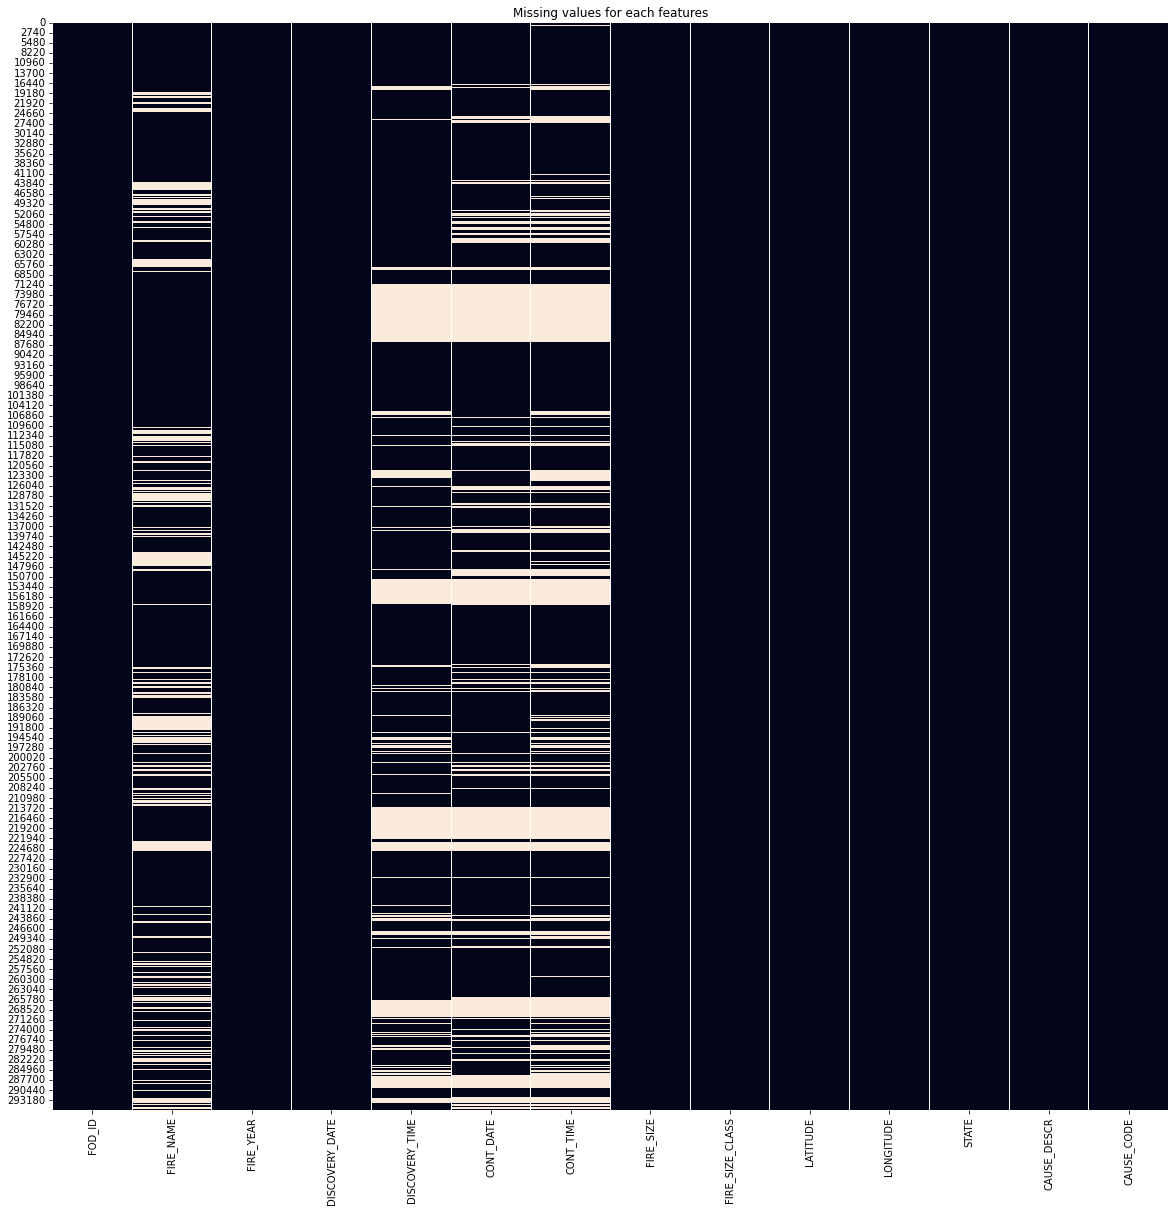

In [187]:
# Ploting the missing values throughout the dataset
plt.figure(figsize=(20,20))
plt.title("Missing values for each features")
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [188]:
df.isnull().sum()/len(df)

FOD_ID             0.000000
FIRE_NAME          0.217296
FIRE_YEAR          0.000000
DISCOVERY_DATE     0.000000
DISCOVERY_TIME     0.213230
CONT_DATE          0.252287
CONT_TIME          0.310474
FIRE_SIZE          0.000000
FIRE_SIZE_CLASS    0.000000
LATITUDE           0.000000
LONGITUDE          0.000000
STATE              0.000000
CAUSE_DESCR        0.000000
CAUSE_CODE         0.000000
dtype: float64

In [11]:
df['FIRE_NAME'] = df['FIRE_NAME'].fillna("UNKNOWN")

In [12]:
from datetime import date

In [13]:
# Create discovery date into gregorian date
df['DISCOVERY_DATE_display'] = df['DISCOVERY_DATE'] - 1721424.5
df['DISCOVERY_DATE_display'] = df['DISCOVERY_DATE_display'].astype(int)
df['DISCOVERY_DATE_display'] = [date.fromordinal(df['DISCOVERY_DATE_display'][i]) for i in range (len(df))]

In [14]:
# Verification of the sustainability
df['year_julian'] = pd.DatetimeIndex(df['DISCOVERY_DATE_display']).year
sum(df['FIRE_YEAR'] != df['year_julian'])

0

In [15]:
# Mise au bon format de DISCOVERY_TIME
#df['CONT_TIME'] = df['CONT_TIME'].fillna(int(df['CONT_TIME'].mean()))
#cont_time = df['CONT_TIME'].astype('str')
#cont_time = cont_time.apply(lambda x : x[:len(x)-4] + ':' + x[len(x)-4:len(x)-2])
#cont_time = cont_time.apply(lambda x : '00' + x if len(x)==3 else x)
#cont_time = cont_time.apply(lambda x : x[:2] + ':0' + x[3] if len(x)==5 else x)
#df['CONT_TIME'] = cont_time

In [16]:
# Mise au bon format de DISCOVERY_TIME
df['DISCOVERY_TIME'] = df['DISCOVERY_TIME'].fillna(int(df['DISCOVERY_TIME'].mean()))
disc_time = df['DISCOVERY_TIME'].astype('str')
disc_time = disc_time.apply(lambda x : x[:len(x)-4]+':'+x[len(x)-4:len(x)-2])
disc_time = disc_time.apply(lambda x : '00' + x if len(x)==3 else x)
disc_time = disc_time.apply(lambda x : x[:2]+':0'+x[3] if len(x)==5 else x)
df['DISCOVERY_TIME'] = disc_time

In [17]:
# Création de la feature DISCOVERY_DATETIME qui merge la date et l'heure sous format datetime
df['DISCOVERY_DATETIME'] = df['DISCOVERY_DATE_display'].astype(str) + ' ' + df['DISCOVERY_TIME']
df['DISCOVERY_DATETIME'] = pd.to_datetime(df['DISCOVERY_DATETIME'])

In [20]:
# Create cont date into gregorian date when there is a value
df_with_cont_date = df.dropna(subset=['CONT_DATE'])
print("Nombre de valeurs manquantes dans le nv dataset: ", sum(df_with_cont_date['CONT_DATE'].isnull()))


list_index = df_with_cont_date.index
df_with_cont_date['CONT_DATE_display'] = df_with_cont_date['CONT_DATE'] - 1721424.5
df_with_cont_date['CONT_DATE_display'] = df_with_cont_date['CONT_DATE_display'].astype(int)
df_with_cont_date['CONT_DATE_display'] = [date.fromordinal(df_with_cont_date['CONT_DATE_display'][i]) for i in list_index]

# Verification que la date de fin est après la date de début du feu
sum(df_with_cont_date['DISCOVERY_DATE_display'] > df_with_cont_date['CONT_DATE_display'])

Nombre de valeurs manquantes dans le nv dataset:  0


0

In [21]:
df_with_cont_date['DURATION_FIRE'] = df_with_cont_date['CONT_DATE_display'] - df_with_cont_date['DISCOVERY_DATE_display']
df_with_cont_date['DURATION_FIRE'] = df_with_cont_date['DURATION_FIRE'].dt.days
mean_duration_fire = df_with_cont_date['DURATION_FIRE'].mean()

In [22]:
mean_duration_fire

1.8709710958619254

In [78]:
df_with_cont_date['CONT_TIME'] = df_with_cont_date['CONT_TIME'].fillna(int(df_with_cont_date['CONT_TIME'].mean()))
cont_time = df_with_cont_date['CONT_TIME'].astype('str')
cont_time = cont_time.apply(lambda x : x[:len(x)-4] + ':' + x[len(x)-4:len(x)-2])
cont_time = cont_time.apply(lambda x : '00' + x if len(x)==3 else x)
cont_time = cont_time.apply(lambda x : x[:2] + ':0' + x[3] if len(x)==5 else x)
df_with_cont_date['CONT_TIME'] = cont_time

In [80]:
df_with_cont_date['CONT_DATETIME'] = df_with_cont_date['CONT_DATE_display'].astype(str) + ' ' + df_with_cont_date['CONT_TIME']
df_with_cont_date['CONT_DATETIME'] = pd.to_datetime(df_with_cont_date['CONT_DATETIME'])

In [83]:
df_with_cont_date['DISCOVERY_DATE_display'] = pd.to_datetime(df_with_cont_date['DISCOVERY_DATE_display'])
df_with_cont_date['CONT_DATE_display'] = pd.to_datetime(df_with_cont_date['CONT_DATE_display'])

In [84]:
df_with_cont_date.dtypes

FOD_ID                             int64
FIRE_NAME                         object
FIRE_YEAR                          int64
DISCOVERY_DATE                   float64
DISCOVERY_TIME                    object
CONT_DATE                        float64
CONT_TIME                         object
FIRE_SIZE                        float64
FIRE_SIZE_CLASS                   object
LATITUDE                         float64
LONGITUDE                        float64
STATE                             object
CAUSE_DESCR                       object
CAUSE_CODE                         int64
DISCOVERY_DATE_display    datetime64[ns]
year_julian                        int64
DISCOVERY_DATETIME        datetime64[ns]
CONT_DATE_display         datetime64[ns]
DURATION_FIRE                      int64
CONT_DATETIME             datetime64[ns]
dtype: object

In [85]:
df_without_cont_date = df.loc[df['CONT_DATE'].isnull()]

In [86]:
import datetime

In [87]:
df_without_cont_date['CONT_DATE_display'] = df_without_cont_date['DISCOVERY_DATETIME'] + datetime.timedelta(days=1.87)

In [90]:
cont_date_display = list(df_without_cont_date['CONT_DATE_display'].astype(str).str.split())

cont_date = [date[0] for date in cont_date_display]
cont_time = [date[1] for date in cont_date_display]
cont_time = [time.split(":")[0] + ":" + time.split(":")[1] for time in cont_time]

df_without_cont_date['CONT_DATE_display'] = cont_date
df_without_cont_date['CONT_TIME'] = cont_time

In [91]:
df_without_cont_date.head()

,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,CAUSE_DESCR,CAUSE_CODE,DISCOVERY_DATE_display,year_julian,DISCOVERY_DATETIME,CONT_DATE_display
94,20020154,12 MILE,2011,2455821.5,14:00,NaN,10:52,0.1,A,44.164167,-85.851944,MI,other,3,2011-09-17,2011,2011-09-17 14:00:00,2011-09-19
272,20020351,KEK 1,2011,2455757.5,10:02,NaN,06:54,0.1,A,48.050833,-91.190556,MN,criminal,2,2011-07-15,2011,2011-07-15 10:02:00,2011-07-17
274,20020353,KEK BLUFF,2011,2455758.5,14:05,NaN,10:57,0.1,A,48.075556,-91.157500,MN,criminal,2,2011-07-16,2011,2011-07-16 14:05:00,2011-07-18
275,20020354,KNIFE RIVER,2011,2455762.5,8:10,NaN,05:02,0.1,A,48.073056,-91.313333,MN,criminal,2,2011-07-20,2011,2011-07-20 08:10:00,2011-07-22
421,20020510,CASTRO,2011,2455777.5,15:01,NaN,11:53,4853.0,F,44.211667,-115.353333,ID,natural,0,2011-08-04,2011,2011-08-04 15:01:00,2011-08-06


In [92]:
df_without_cont_date['DISCOVERY_DATE_display'] = pd.to_datetime(df_without_cont_date['DISCOVERY_DATE_display'])

In [93]:
df_without_cont_date['CONT_DATETIME'] = df_without_cont_date['CONT_DATE_display'].astype(str) + ' ' + df_without_cont_date['CONT_TIME']
df_without_cont_date['CONT_DATETIME'] = pd.to_datetime(df_without_cont_date['CONT_DATETIME'])
df_without_cont_date['CONT_DATE_display'] = pd.to_datetime(df_without_cont_date['CONT_DATE_display'])

In [94]:
df_without_cont_date['DURATION_FIRE'] = df_without_cont_date['CONT_DATE_display'] - df_without_cont_date['DISCOVERY_DATE_display']
df_without_cont_date['DURATION_FIRE'] = df_without_cont_date['DURATION_FIRE'].dt.days

In [95]:
df_without_cont_date.head()

,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,CAUSE_DESCR,CAUSE_CODE,DISCOVERY_DATE_display,year_julian,DISCOVERY_DATETIME,CONT_DATE_display,CONT_DATETIME,DURATION_FIRE
94,20020154,12 MILE,2011,2455821.5,14:00,NaN,10:52,0.1,A,44.164167,-85.851944,MI,other,3,2011-09-17,2011,2011-09-17 14:00:00,2011-09-19,2011-09-19 10:52:00,2
272,20020351,KEK 1,2011,2455757.5,10:02,NaN,06:54,0.1,A,48.050833,-91.190556,MN,criminal,2,2011-07-15,2011,2011-07-15 10:02:00,2011-07-17,2011-07-17 06:54:00,2
274,20020353,KEK BLUFF,2011,2455758.5,14:05,NaN,10:57,0.1,A,48.075556,-91.157500,MN,criminal,2,2011-07-16,2011,2011-07-16 14:05:00,2011-07-18,2011-07-18 10:57:00,2
275,20020354,KNIFE RIVER,2011,2455762.5,8:10,NaN,05:02,0.1,A,48.073056,-91.313333,MN,criminal,2,2011-07-20,2011,2011-07-20 08:10:00,2011-07-22,2011-07-22 05:02:00,2
421,20020510,CASTRO,2011,2455777.5,15:01,NaN,11:53,4853.0,F,44.211667,-115.353333,ID,natural,0,2011-08-04,2011,2011-08-04 15:01:00,2011-08-06,2011-08-06 11:53:00,2


In [96]:
df_with_cont_date.columns

Index(['FOD_ID', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_TIME',
       'CONT_DATE', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'CAUSE_DESCR', 'CAUSE_CODE',
       'DISCOVERY_DATE_display', 'year_julian', 'DISCOVERY_DATETIME',
       'CONT_DATE_display', 'DURATION_FIRE', 'CONT_DATETIME'],
      dtype='object')

In [97]:
df_without_cont_date.columns

Index(['FOD_ID', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_TIME',
       'CONT_DATE', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'CAUSE_DESCR', 'CAUSE_CODE',
       'DISCOVERY_DATE_display', 'year_julian', 'DISCOVERY_DATETIME',
       'CONT_DATE_display', 'CONT_DATETIME', 'DURATION_FIRE'],
      dtype='object')

In [98]:
#df = df.sort_values(by='DISCOVERY_DATE_display')

In [102]:
df_final = pd.concat([df_with_cont_date, df_without_cont_date])

In [104]:
df_final.head()

,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,CAUSE_DESCR,CAUSE_CODE,DISCOVERY_DATE_display,year_julian,DISCOVERY_DATETIME,CONT_DATE_display,DURATION_FIRE,CONT_DATETIME
0,20020059,VFD BEAR CREEK #1,2011,2455641.5,12:01,2455641.5,16:01,0.1,A,60.246389,-149.349444,AK,accidental,1,2011-03-21,2011,2011-03-21 12:01:00,2011-03-21,0,2011-03-21 16:01:00
1,20020060,CPR LNDG ORGANIC DMP,2011,2455666.5,18:01,2455669.5,11:05,0.1,A,60.475833,-149.752500,AK,accidental,1,2011-04-15,2011,2011-04-15 18:01:00,2011-04-18,3,2011-04-18 11:05:00
2,20020061,TOKLAT WAY DEBRIS,2011,2455692.5,12:05,2455692.5,13:03,0.1,A,60.514444,-149.467500,AK,accidental,1,2011-05-11,2011,2011-05-11 12:05:00,2011-05-11,0,2011-05-11 13:03:00
3,20020062,LAWING DRIVE,2011,2455694.5,12:02,2455694.5,12:05,0.1,A,60.399722,-149.360833,AK,accidental,1,2011-05-13,2011,2011-05-13 12:02:00,2011-05-13,0,2011-05-13 12:05:00
4,20020063,RUSSIAN RIVER TRAIL,2011,2455759.5,10:02,2455759.5,12:03,0.1,A,60.467500,-149.973056,AK,accidental,1,2011-07-17,2011,2011-07-17 10:02:00,2011-07-17,0,2011-07-17 12:03:00


In [106]:
df_clean = df_final.drop(['DISCOVERY_DATE', 'CONT_DATE', 'year_julian'], axis=1)

In [107]:
df_clean.head()

,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_TIME,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,CAUSE_DESCR,CAUSE_CODE,DISCOVERY_DATE_display,DISCOVERY_DATETIME,CONT_DATE_display,DURATION_FIRE,CONT_DATETIME
0,20020059,VFD BEAR CREEK #1,2011,12:01,16:01,0.1,A,60.246389,-149.349444,AK,accidental,1,2011-03-21,2011-03-21 12:01:00,2011-03-21,0,2011-03-21 16:01:00
1,20020060,CPR LNDG ORGANIC DMP,2011,18:01,11:05,0.1,A,60.475833,-149.752500,AK,accidental,1,2011-04-15,2011-04-15 18:01:00,2011-04-18,3,2011-04-18 11:05:00
2,20020061,TOKLAT WAY DEBRIS,2011,12:05,13:03,0.1,A,60.514444,-149.467500,AK,accidental,1,2011-05-11,2011-05-11 12:05:00,2011-05-11,0,2011-05-11 13:03:00
3,20020062,LAWING DRIVE,2011,12:02,12:05,0.1,A,60.399722,-149.360833,AK,accidental,1,2011-05-13,2011-05-13 12:02:00,2011-05-13,0,2011-05-13 12:05:00
4,20020063,RUSSIAN RIVER TRAIL,2011,10:02,12:03,0.1,A,60.467500,-149.973056,AK,accidental,1,2011-07-17,2011-07-17 10:02:00,2011-07-17,0,2011-07-17 12:03:00


In [119]:
df_clean.to_csv(dest_file, index=False)

# Take Away
- Edit variable types / formats
- Identify duplicates
- Delete columns with many missing values
- Use common sense and keep only relevant variables
- Observe the distribution of values of a variable
- Visual representations are useful to understand how a variable works

### Pitfalls to avoid
- Automatically delete a duplicate: understand why the duplicate appeared
- Automatically delete all rows with missing values and lose information. Approximating some values allows you to keep information to meet an objective.
- Automatically delete outliers: understand where they come from, are they errors or do they only represent extreme cases?
- Retain variables that could be harmful to the ethics of a project (skin color, address...)

### Go Further :
- [The Ultimate Guide to Data Cleaning](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4)
- [Learn Data Cleaning Tutorials | Kaggle](https://www.kaggle.com/learn/data-cleaning)
